In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,export_text,plot_tree
from sklearn.model_selection import cross_validate,cross_val_score,learning_curve,ShuffleSplit,train_test_split,validation_curve,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
plt.style.use('seaborn')

In [3]:
cv = ShuffleSplit(n_splits=10, test_size=0.2)
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
X,X_test,y,y_test = train_test_split(features, labels)
X_train,X_dev,y_train,y_dev = train_test_split(X, y)


In [6]:
dt_pipe = Pipeline([("feature_scaling", StandardScaler()),("dt_reg",DecisionTreeRegressor(max_depth=3))])
dt_cv = cross_validate(dt_pipe,X_train,y_train,cv=cv,scoring="neg_mean_absolute_error",return_train_score=True,return_estimator=True)
print(dt_cv['train_score'].mean(),dt_cv['train_score'].std(),dt_cv['test_score'].mean(),dt_cv['test_score'].std())

-0.5892368195559026 0.0034092353515313167 -0.5928170924587153 0.0126672618775202


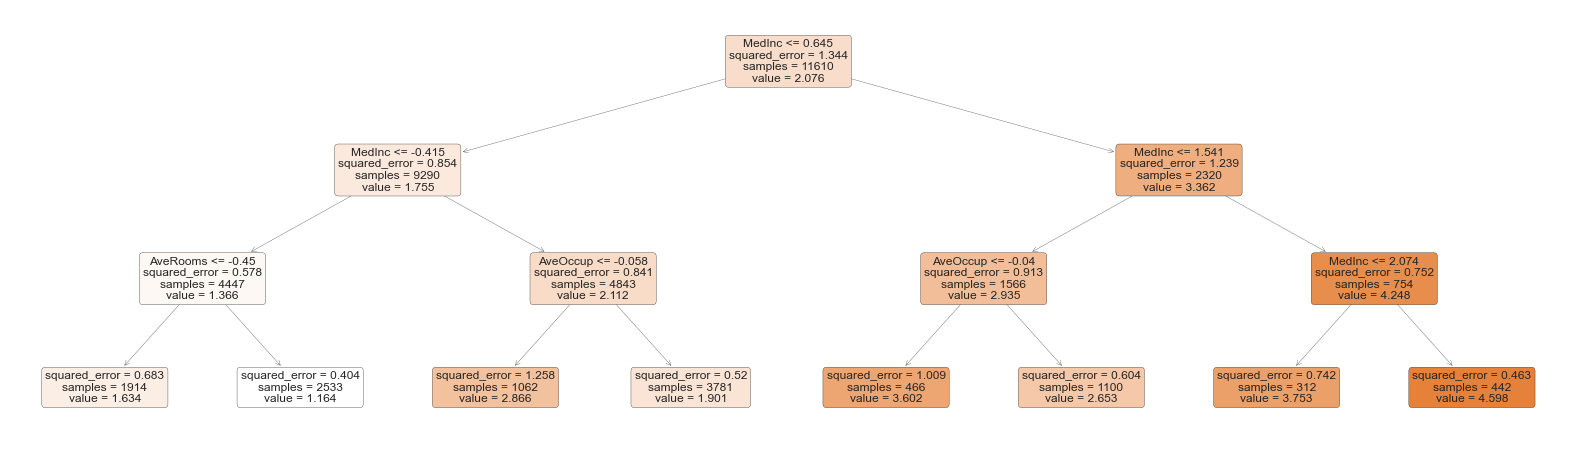

In [11]:
dt_pipe.fit(X_train,y_train)
plt.figure(figsize=(28,8))
a = tree.plot_tree(dt_pipe[-1],feature_names=X_train.columns,rounded=True, filled=True,fontsize=12)
plt.show()

In [15]:
dev_pred = dt_pipe.predict(X_dev)
dev_mse = mean_squared_error(dev_pred,y_dev)
print(dev_mse)


0.613207838779773


In [16]:
grid = {'dt_reg__max_depth':range(1,20),'dt_reg__min_samples_split':range(2,8)}
dt_grid_cv = GridSearchCV(dt_pipe,param_grid=grid,n_jobs=2,cv=cv,scoring="neg_mean_absolute_error",return_train_score=True)
dt_grid_cv.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('dt_reg',
                                        DecisionTreeRegressor(max_depth=3))]),
             n_jobs=2,
             param_grid={'dt_reg__max_depth': range(1, 20),
                         'dt_reg__min_samples_split': range(2, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [17]:
mean_train=dt_grid_cv.cv_results_['mean_train_score'][dt_grid_cv.best_index_]
mean_test=dt_grid_cv.cv_results_['mean_test_score'][dt_grid_cv.best_index_]
print(mean_train,mean_test)

-0.269824151197846 -0.44827237006355036


In [19]:
dt_grid_cv.best_score_,dt_grid_cv.best_params_

(-0.44827237006355036,
 {'dt_reg__max_depth': 11, 'dt_reg__min_samples_split': 7})

In [20]:
dt_pipe.set_params(dt_reg__max_depth=11,dt_reg__min_samples_split=5).fit(X_train,y_train)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5))])

In [21]:
dev_pred = dt_pipe.predict(X_dev)
dev_mse = mean_squared_error(dev_pred,y_dev)
print(dev_mse)

0.4664894454015368


In [24]:
test_pred = dt_pipe.predict(X_test)
mse = mean_squared_error(test_pred,y_test)
print(mse)


0.4716848463441359
